# Tesla_Prediction_Model using Linear Regression

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
plt.style.use('Solarize_Light2')

## Read & Load The Data

In [2]:
ds=pd.read_csv("Tesla_dataset.csv")
ds.head(100)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
95,2010-11-11,1.906667,1.940000,1.822000,1.869333,1.869333,29179500
96,2010-11-12,1.883333,2.033333,1.871333,1.989333,1.989333,40936500
97,2010-11-15,2.014667,2.196000,2.014667,2.053333,2.053333,39343500
98,2010-11-16,2.066667,2.093333,1.894667,1.978000,1.978000,20214000


In [3]:
ds.shape

(3505, 7)

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3505 entries, 0 to 3504
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3505 non-null   object 
 1   Open       3505 non-null   float64
 2   High       3505 non-null   float64
 3   Low        3505 non-null   float64
 4   Close      3505 non-null   float64
 5   Adj Close  3505 non-null   float64
 6   Volume     3505 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 191.8+ KB


In [5]:
ds.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3.505000e+03
mean,73.941523,75.549608,72.209440,73.916853,73.916853,9.688131e+07
std,101.999877,104.246204,99.526282,101.916537,101.916537,7.897872e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,11.345333,11.546667,11.010000,11.310667,11.310667,4.716300e+07
50%,17.302000,17.557333,16.969334,17.319332,17.319332,8.214300e+07
75%,146.919998,149.630005,142.833328,147.050003,147.050003,1.226595e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [6]:
ds.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## EDA

<function matplotlib.pyplot.show(close=None, block=None)>

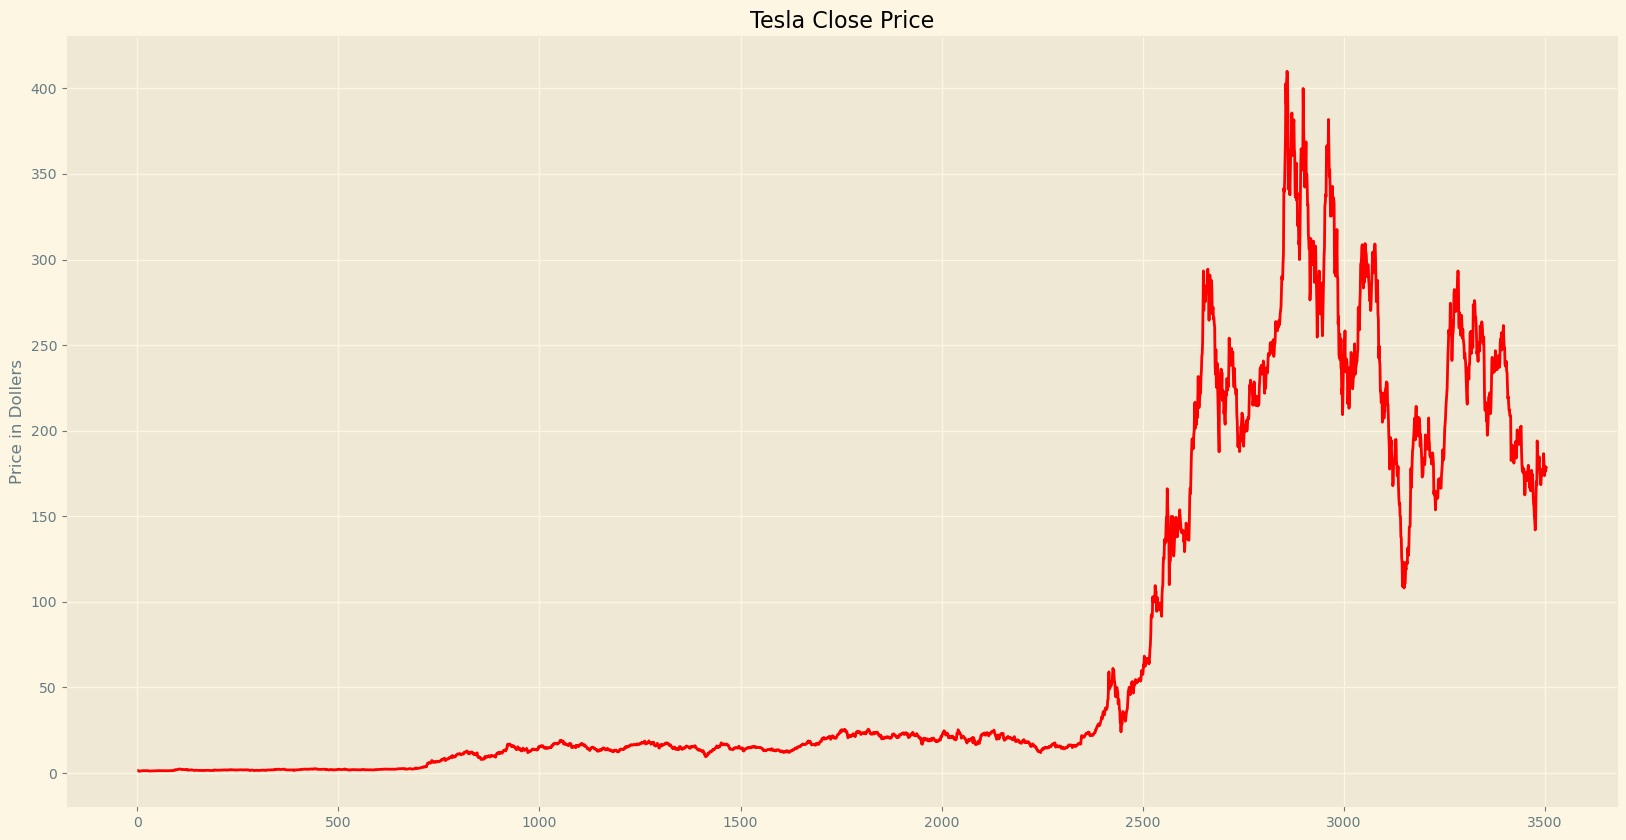

In [7]:
plt.figure(figsize=(20,10))
plt.plot(ds['Close'],c='r')
plt.title("Tesla Close Price")
plt.ylabel("Price in Dollers")
plt.show

C:\Users\notsu\AppData\Local\Temp\ipykernel_8536\669627363.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds[col])
C:\Users\notsu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\notsu\AppData\Local\Temp\ipykernel_8536\669627363.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `his

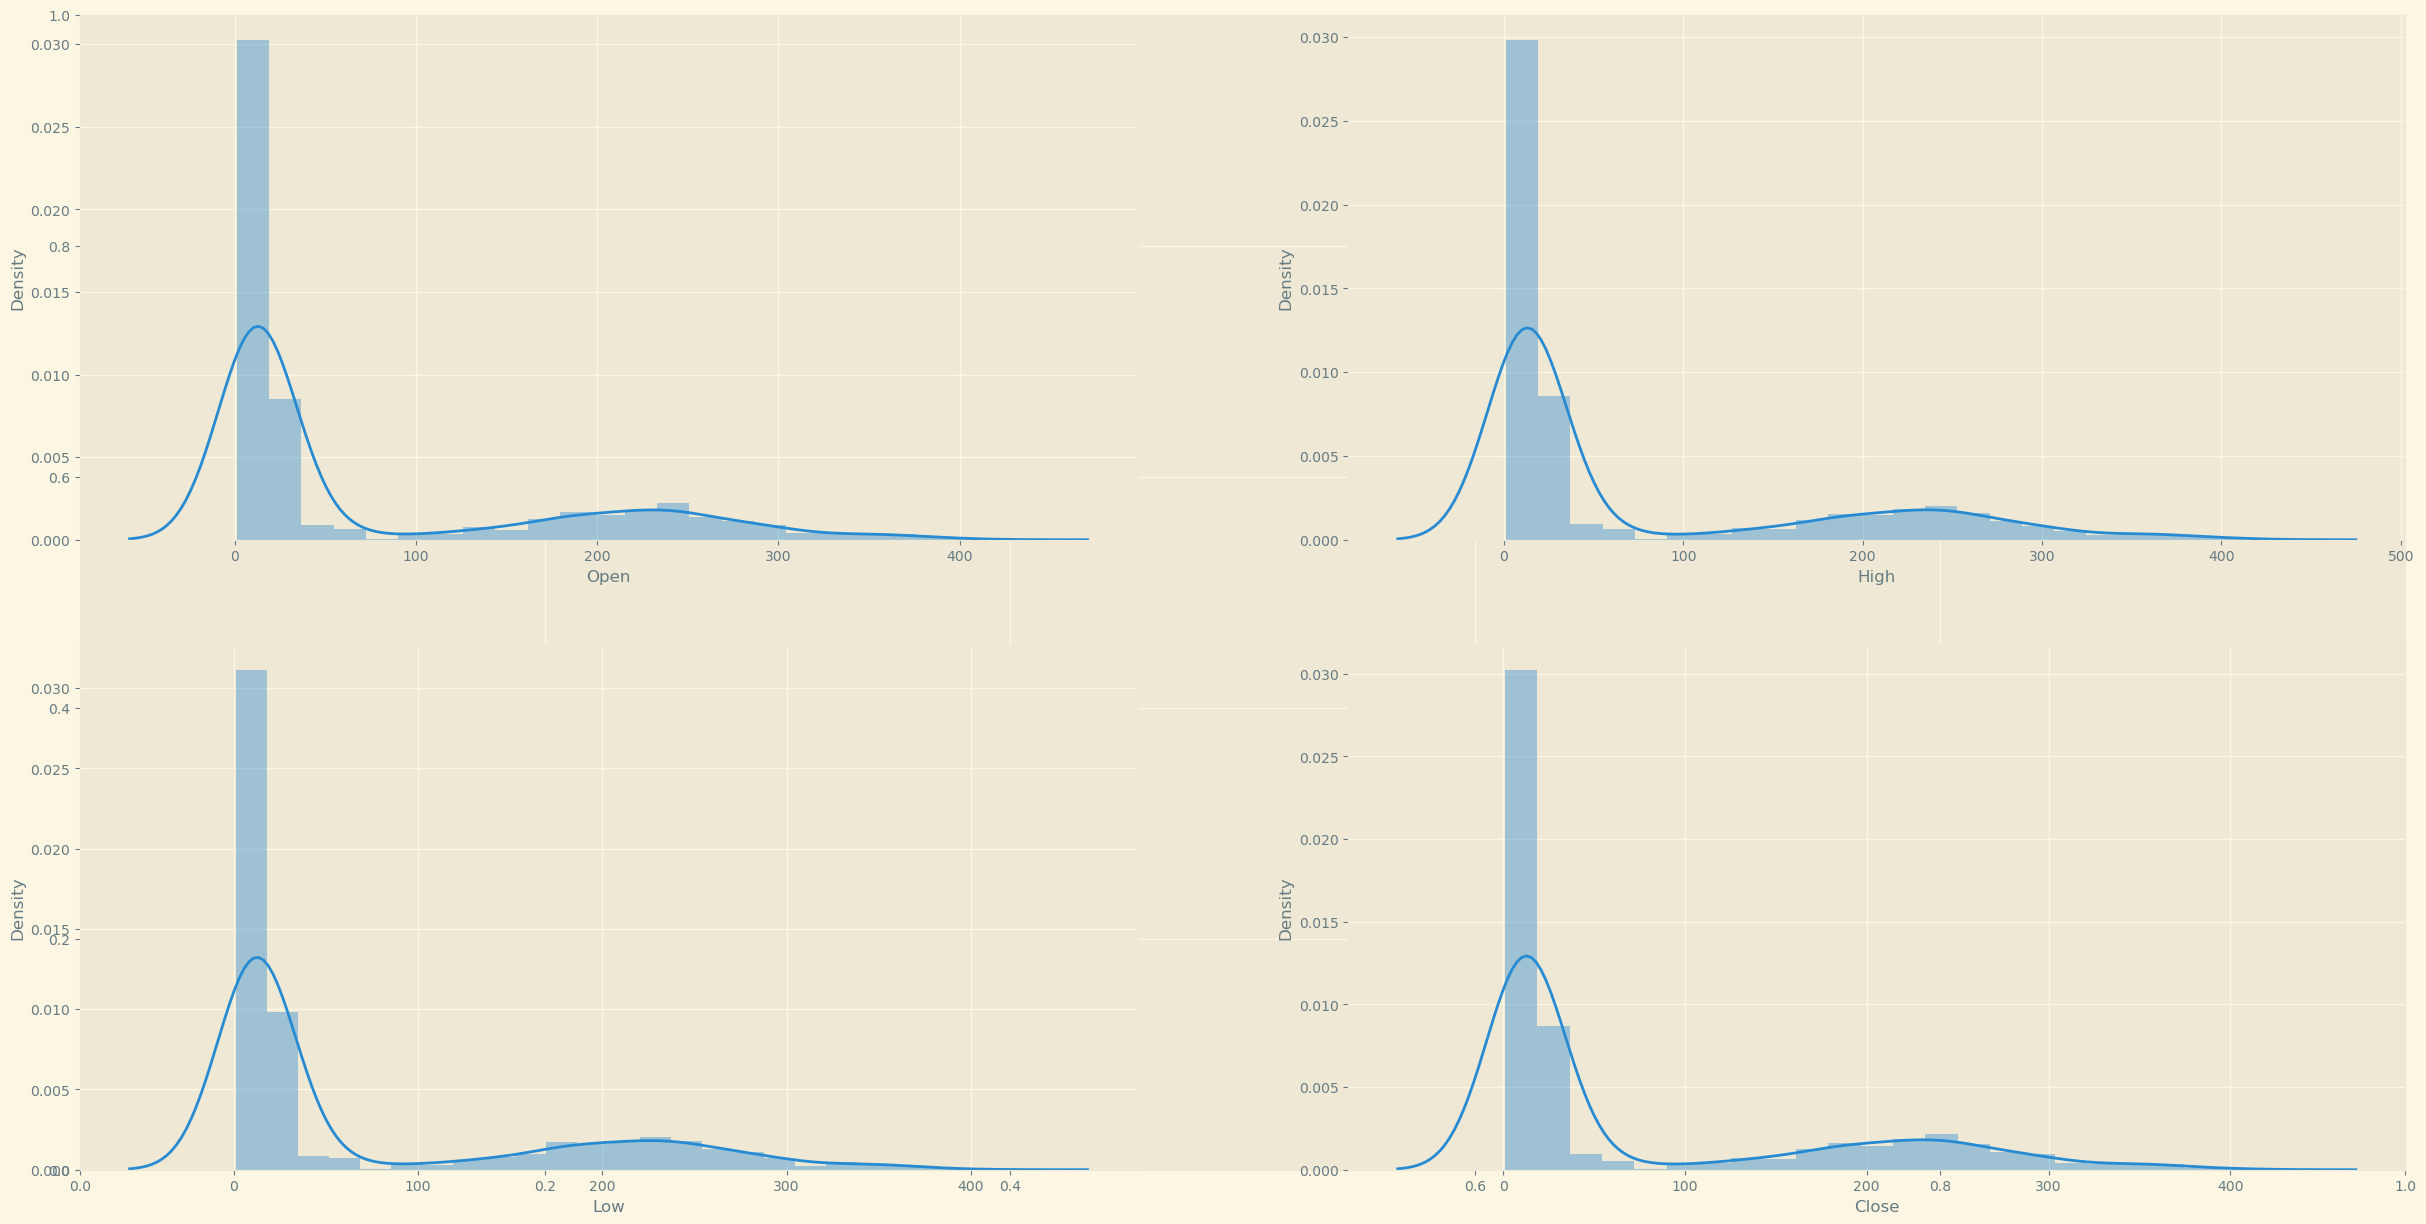

In [8]:
feature=['Open','High','Low','Close']
plt.subplots(figsize=(30,15))
for i, col in enumerate(feature):
  plt.subplot(2,2,i+1)
  sns.distplot(ds[col])
plt.show()

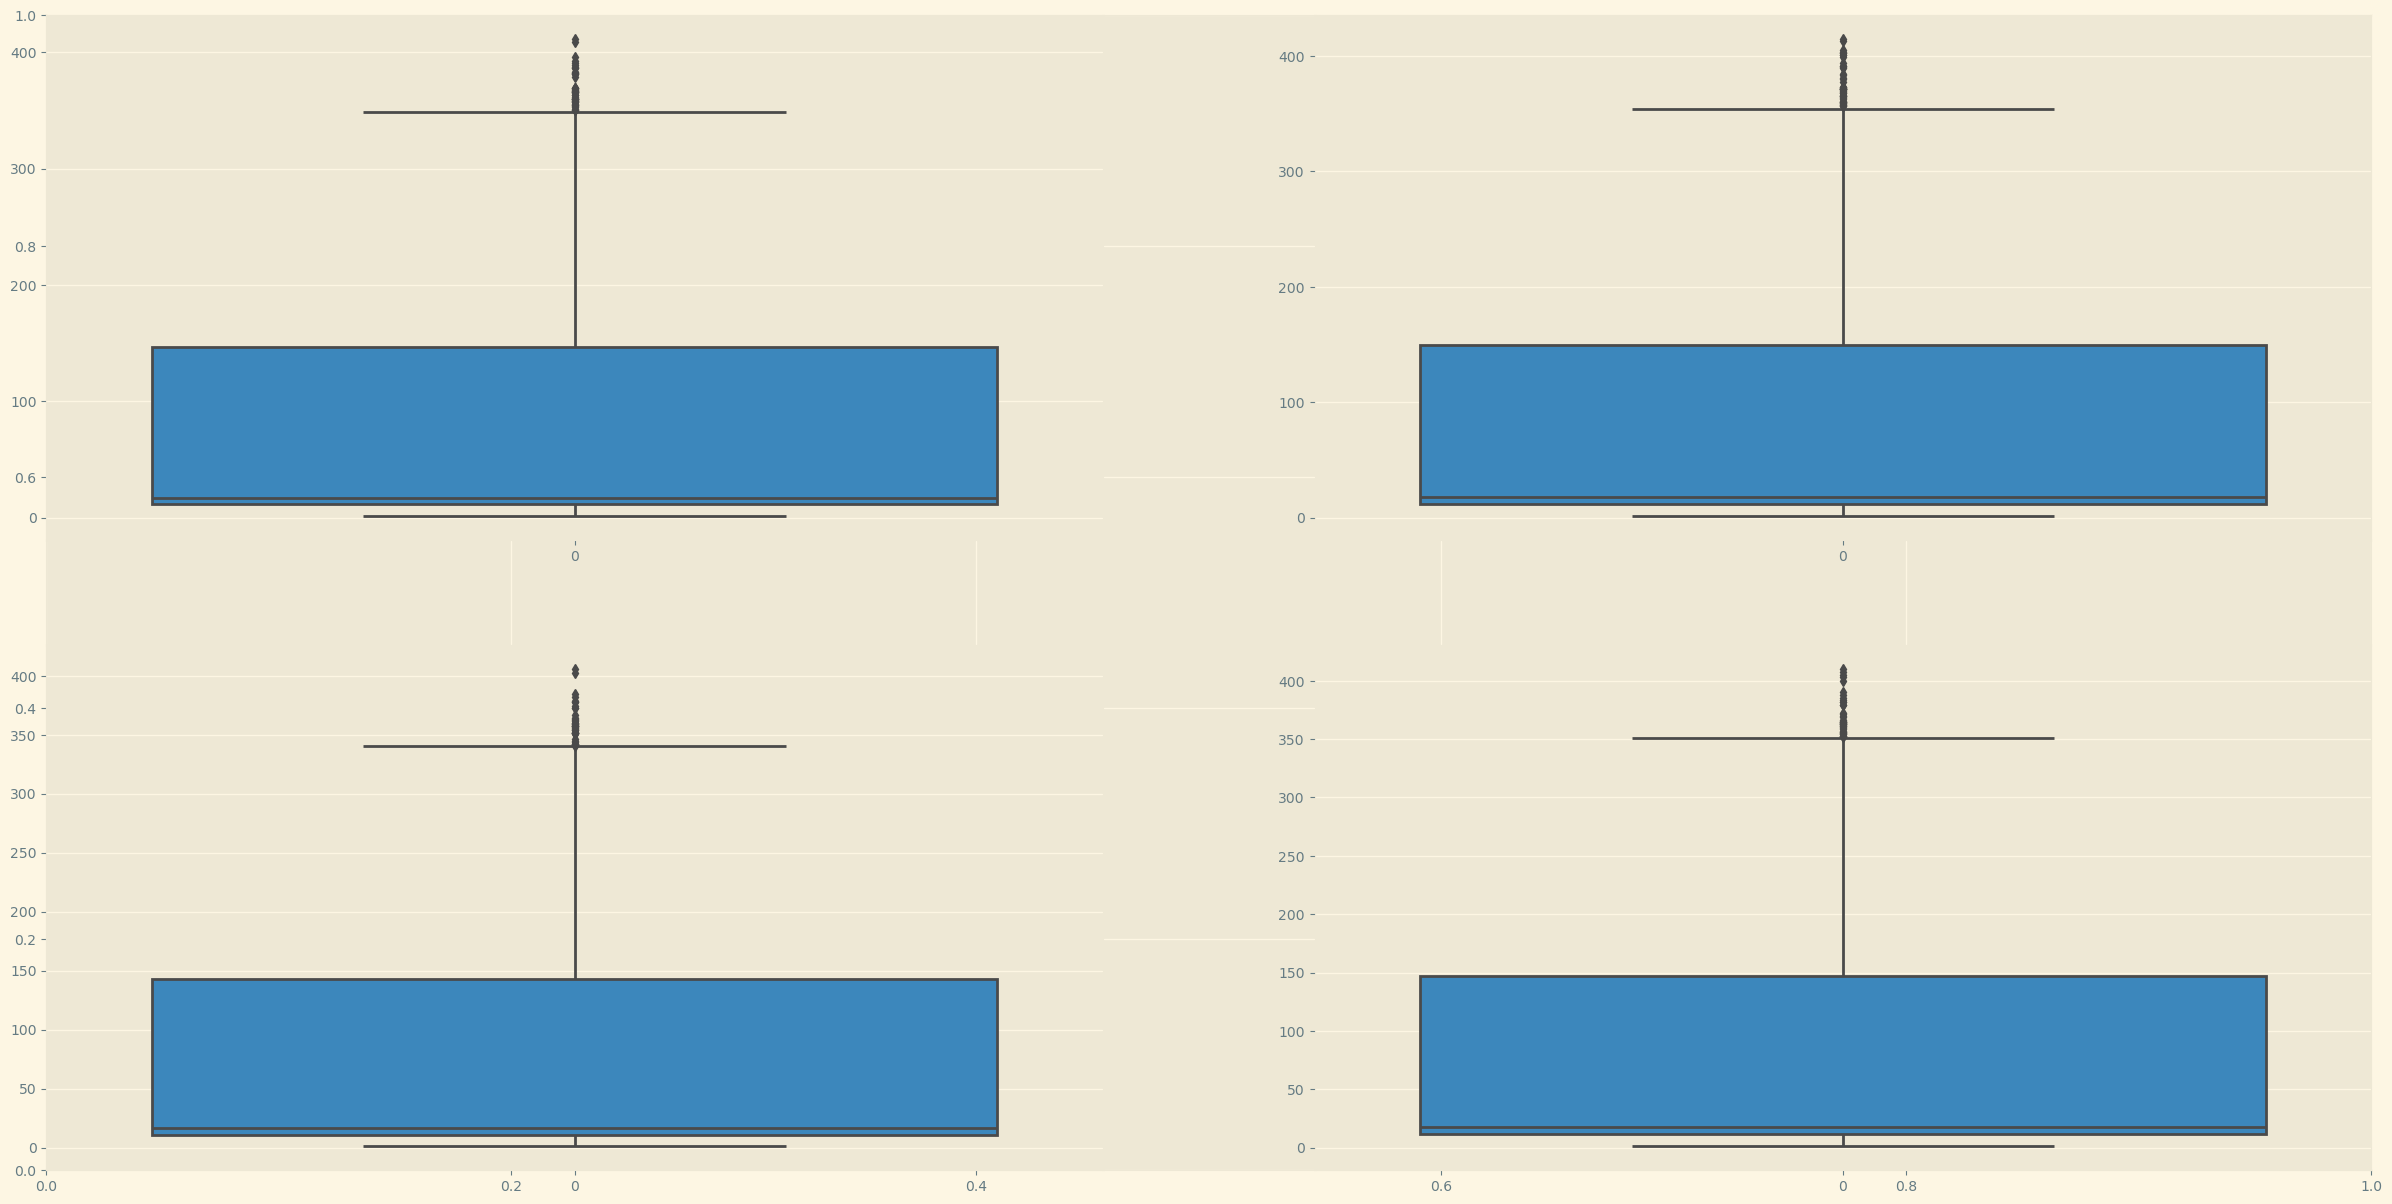

In [9]:
plt.subplots(figsize=(30,15))
for i, col in enumerate(feature):
  plt.subplot(2,2,i+1)
  sns.boxplot(ds[col])
plt.show()

In [10]:
Time=ds['Date'].str.split('-',expand=True)
ds['year']=Time[0].astype('int')
ds['month']=Time[1].astype('int')
ds['day']=Time[2].astype('int')

In [11]:
ds.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,2010,6,29
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,2010,6,30
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,2010,7,1
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,2010,7,2
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,2010,7,6


In [12]:
ds=ds.drop(['Adj Close'],axis=1)
ds=ds.drop(['Date'],axis=1)

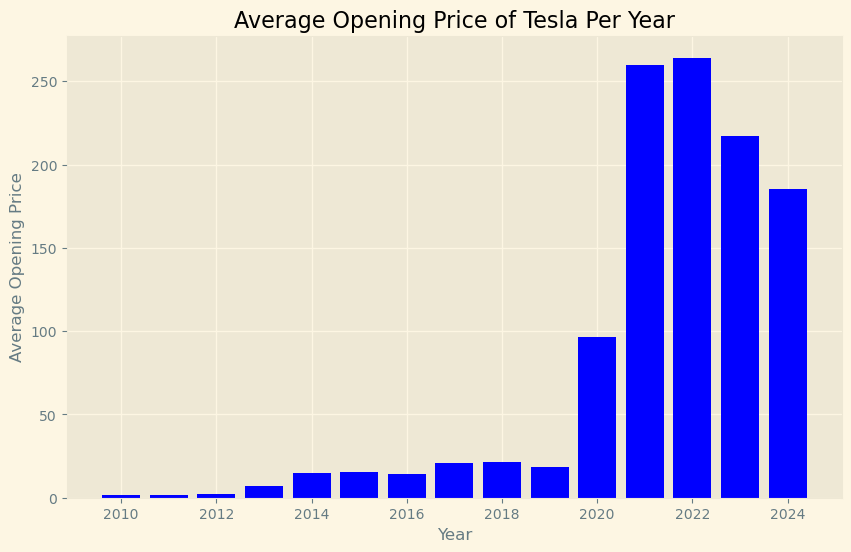

In [13]:
mean_open_price_per_year = ds.groupby('year')['Open'].mean().reset_index()


plt.figure(figsize=(10, 6))
plt.bar(mean_open_price_per_year['year'], mean_open_price_per_year['Open'], color='blue')
plt.xlabel('Year')
plt.ylabel('Average Opening Price')
plt.title('Average Opening Price of Tesla Per Year')
plt.grid(True)
plt.show()

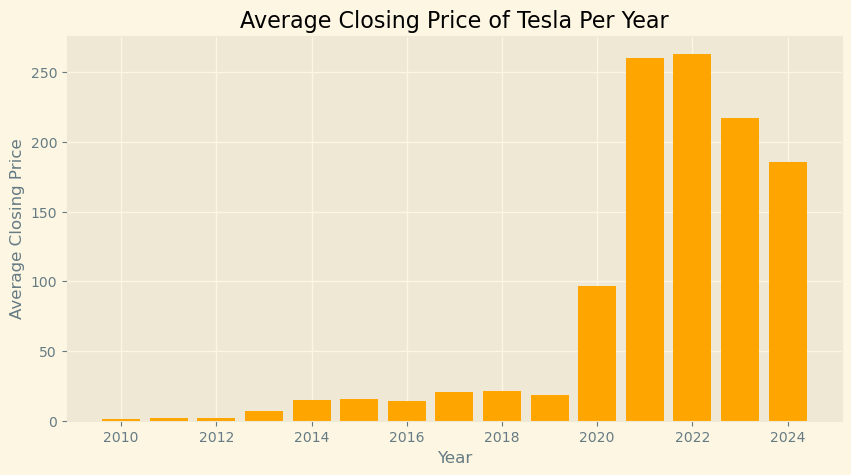

In [14]:
mean_open_price_per_year = ds.groupby('year')['Close'].mean().reset_index()


plt.figure(figsize=(10, 5))
plt.bar(mean_open_price_per_year['year'], mean_open_price_per_year['Close'], color='orange')
plt.xlabel('Year')
plt.ylabel('Average Closing Price')
plt.title('Average Closing Price of Tesla Per Year')
plt.grid(True)
plt.show()

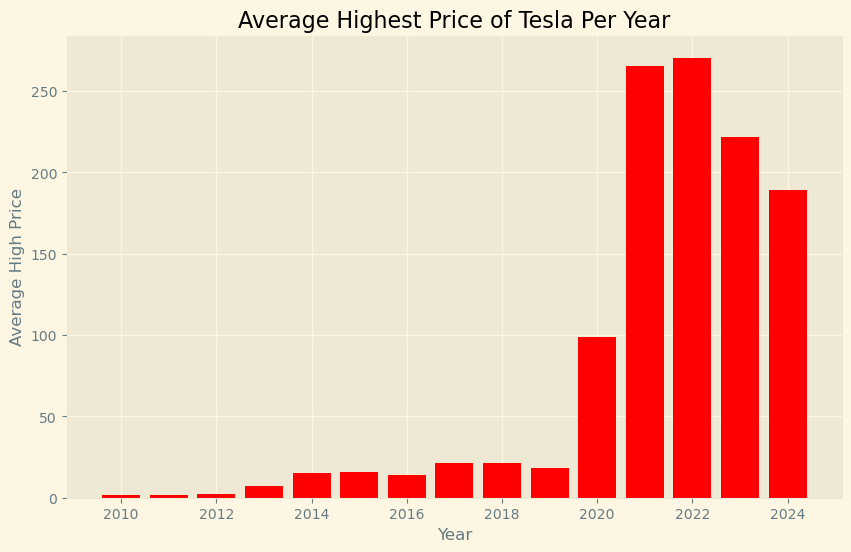

In [15]:
mean_open_price_per_year = ds.groupby('year')['High'].mean().reset_index()


plt.figure(figsize=(10, 6))
plt.bar(mean_open_price_per_year['year'], mean_open_price_per_year['High'], color='red')
plt.xlabel('Year')
plt.ylabel('Average High Price')
plt.title('Average Highest Price of Tesla Per Year')
plt.grid(True)
plt.show()

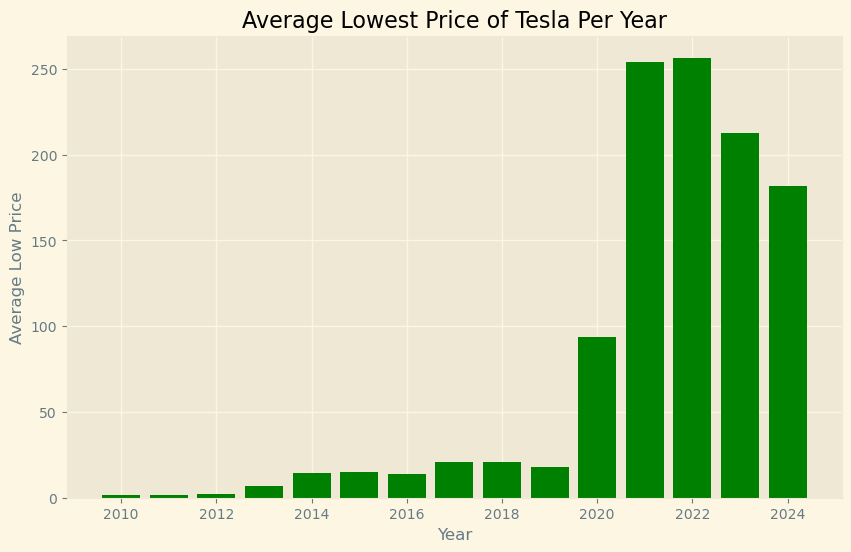

In [16]:
mean_open_price_per_year = ds.groupby('year')['Low'].mean().reset_index()


plt.figure(figsize=(10, 6))
plt.bar(mean_open_price_per_year['year'], mean_open_price_per_year['Low'], color='green')
plt.xlabel('Year')
plt.ylabel('Average Low Price')
plt.title('Average Lowest Price of Tesla Per Year')
plt.grid(True)
plt.show()

In [17]:
correlation_matrix = ds.corr()

In [18]:
print(correlation_matrix)

            Open      High       Low     Close    Volume      year     month  \
Open    1.000000  0.999729  0.999629  0.999229  0.103529  0.775537 -0.001803   
High    0.999729  1.000000  0.999634  0.999655  0.107086  0.775517 -0.002596   
Low     0.999629  0.999634  1.000000  0.999689  0.100283  0.775976 -0.001018   
Close   0.999229  0.999655  0.999689  1.000000  0.104461  0.775798 -0.001692   
Volume  0.103529  0.107086  0.100283  0.104461  1.000000  0.386134 -0.086733   
year    0.775537  0.775517  0.775976  0.775798  0.386134  1.000000 -0.106275   
month  -0.001803 -0.002596 -0.001018 -0.001692 -0.086733 -0.106275  1.000000   
day    -0.003394 -0.002498 -0.002337 -0.001964 -0.036677 -0.002101  0.000984   

             day  
Open   -0.003394  
High   -0.002498  
Low    -0.002337  
Close  -0.001964  
Volume -0.036677  
year   -0.002101  
month   0.000984  
day     1.000000  


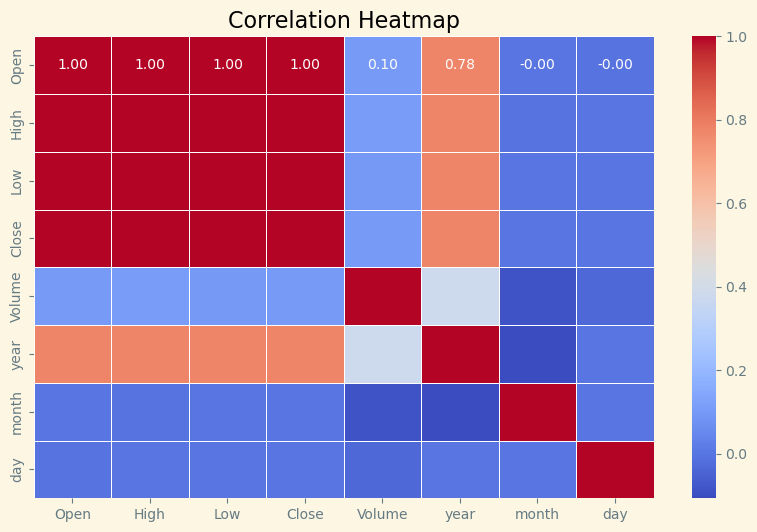

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

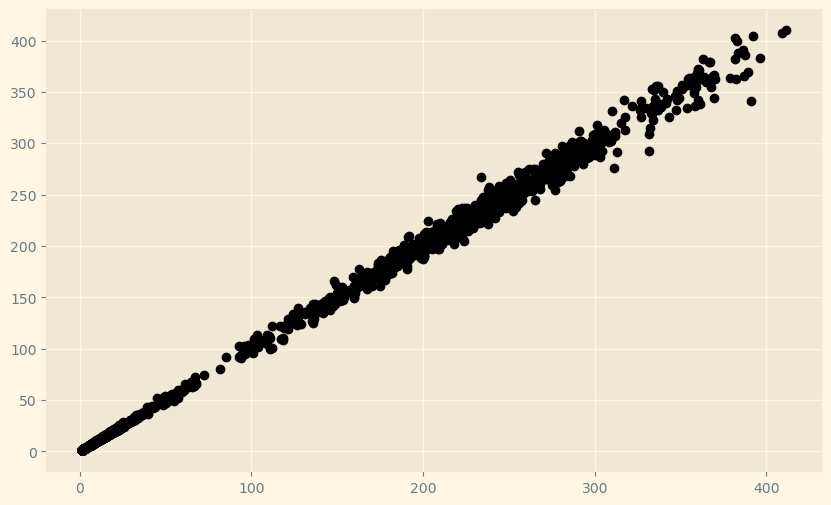

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(ds['Open'],ds['Close'],c='k')
plt.show()

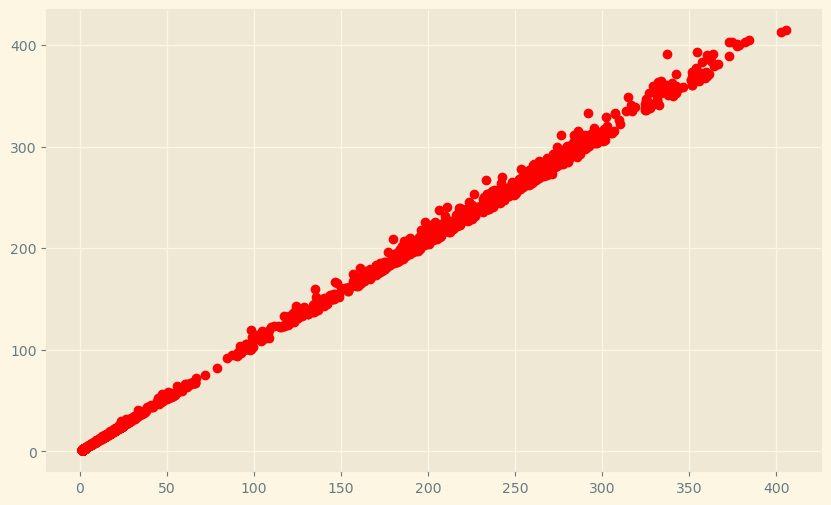

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(ds['Low'],ds['High'],c='r')
plt.show()

## Model Development and Evaluation

In [22]:
D1 = ds.iloc[::-1]  
D1 = D1[['Close']].reset_index(drop=True)  

D1 = D1.iloc[::-1].reset_index(drop=True)
print(D1.head())

      Close
0  1.592667
1  1.588667
2  1.464000
3  1.280000
4  1.074000


In [23]:
D1 = D1[['Close']]
Q1 = D1['Close'].quantile(0.25)
Q3 = D1['Close'].quantile(0.75)
IQR = Q3 - Q1
outliers = D1[(D1['Close'] < (Q1 - 1.5 * IQR)) | (D1['Close'] > (Q3 + 1.5 * IQR))]

D1 = D1[~((D1['Close'] < (Q1 - 1.5 * IQR)) | (D1['Close'] > (Q3 + 1.5 * IQR)))]

forecast_out = int(85)

D1['Prediction'] = D1[['Close']].shift(-forecast_out)

X = np.array(D1.drop(['Prediction'],axis=1))
X = preprocessing.scale(X)

X_forecast = X[-forecast_out:]
X = X[: D1.shape[0] - forecast_out]

y = np.array(D1['Prediction'])
y = y[:-forecast_out]


In [24]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.2)

In [25]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [26]:
confidence = lr.score(X_test, y_test)
print("confidence: ", confidence)
forecast_prediction = lr.predict(X_test)

confidence:  0.8454005392527375


In [27]:
print(X_test)

[[-0.56244918]
 [-0.10521322]
 [-0.62124157]
 [-0.51747571]
 [-0.46931591]
 [-0.69820917]
 [-0.71030073]
 [ 2.18343707]
 [-0.70843573]
 [-0.59299122]
 [-0.7076443 ]
 [ 2.80955597]
 [ 0.44891353]
 [ 1.58450213]
 [-0.70083118]
 [ 1.95419974]
 [-0.51277534]
 [ 0.68004341]
 [ 1.96424731]
 [-0.59303939]
 [-0.55066041]
 [-0.52377269]
 [-0.54309028]
 [-0.51777851]
 [ 1.71801173]
 [-0.61210236]
 [ 0.61105197]
 [-0.55898756]
 [-0.65661474]
 [-0.65690378]
 [-0.49777961]
 [-0.28770844]
 [-0.70264802]
 [-0.48939052]
 [-0.61925958]
 [-0.64042842]
 [-0.68839552]
 [-0.50587276]
 [-0.37020222]
 [-0.57436181]
 [ 1.02978355]
 [-0.55218821]
 [-0.57329511]
 [-0.70992223]
 [ 0.39138053]
 [-0.54332427]
 [-0.48440111]
 [-0.70048709]
 [ 1.30509546]
 [-0.50712528]
 [-0.58550367]
 [-0.70359772]
 [ 0.29949979]
 [-0.59338349]
 [-0.70399688]
 [-0.54683406]
 [-0.70997728]
 [-0.49632063]
 [-0.71010804]
 [-0.54301459]
 [-0.11749747]
 [ 1.25585515]
 [-0.51384205]
 [ 2.21598882]
 [-0.70457496]
 [-0.49356786]
 [ 1.54541

In [28]:
print(y_test)

[ 23.25600052  66.28800201   9.38133335  16.47066689  24.34333229
   6.48999977   1.797333   192.62333679   1.88333297  15.24666691
   1.86466706 235.91000366 171.78999329 244.52333069   2.33066702
 211.99000549  23.37400055 223.33332825 207.90333557  16.24600029
  13.73200035  22.57933235  14.1960001   20.20999908 306.1333313
  16.70400047 199.31666565  14.66800022  11.98133278  12.86666679
  18.71266747  99.80400085   1.95000005  17.85199928  14.57600021
   8.14000034  10.94799995  14.19200039  99.9406662   13.100667
 189.19000244  15.04333305  10.34466743   2.35466695 213.27667236
  20.78733253  17.51666641   7.28333282 251.94332886  20.90399933
  18.73200035   1.87066698 189.19999695  17.04866791   2.02733302
  13.44799995   2.05333304  18.89733315   2.02066708  15.04733276
 149.38667297 266.44000244  14.64133263 121.81999969   2.13800001
  22.63999939 336.33666992 123.55999756  21.25799942  20.99466705
 279.43331909   2.17533302  21.28466606  13.53999996  15.02666664
 250.22000122

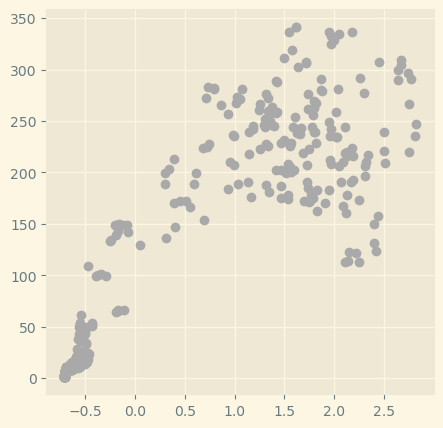

In [29]:
plt.figure(figsize=(5,5))
plt.scatter(X_test, y_test, color='darkgrey', label='data')
plt.show()

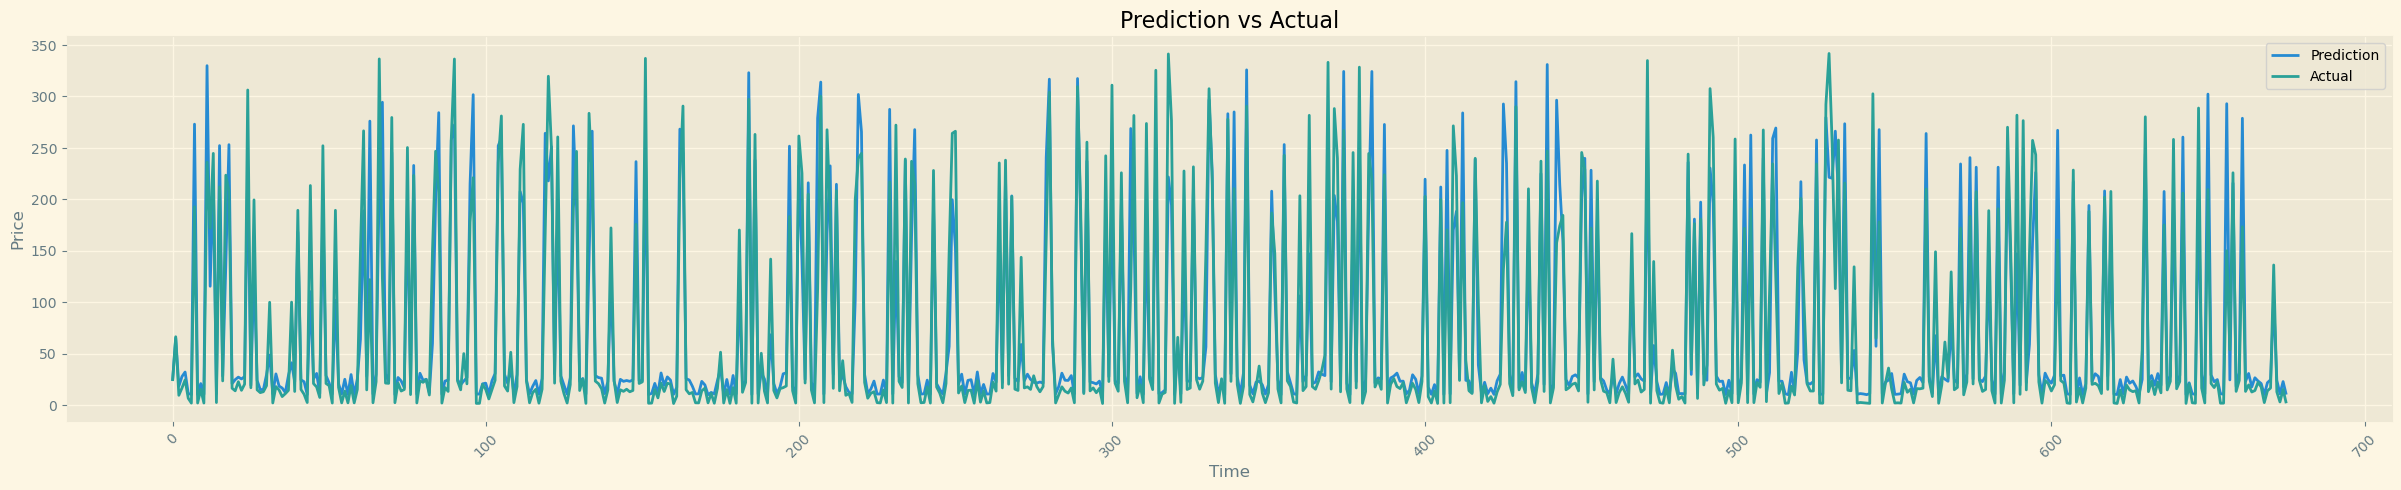

In [30]:
plt.figure(figsize=(30,5))
plt.plot(forecast_prediction, label='Prediction')  
plt.plot(y_test, label='Actual')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Prediction vs Actual')
plt.show()

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
r2 = r2_score(y_test, forecast_prediction)
print('R-squared (R²):', r2)

R-squared (R²): 0.8454005392527375


In [36]:
forecast_predictions = lr.predict(X_forecast)

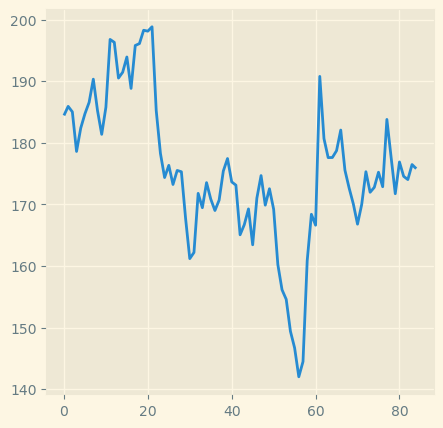

In [37]:
plt.figure(figsize=(5,5))
plt.plot(forecast_predictions)
plt.show()